In [1]:
# This notebook describes how to access the U.S. Energy Information Adminstration. The U.S. Energy Information Administration is committed to its free and open data by making it available through an Application Programming Interface (API) and its open data tools. 
#EIA's API is multi-facetted and contains time-series data sets organized by several main energy categories. 

In [2]:
import pandas as pd
import requests
import json
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt


In [3]:

#This call returns the monthly wind power generation data at a state and year level. 
eia_url = "https://api.eia.gov/v2/electricity/electric-power-operational-data/data?api_key=VncsPCILhy2WlSElUxu9SmixaOdqw9gZMobZ5uz9&data[]=generation&facets[fueltypeid][]=WND&frequency=annual&sort[0][column]=period&sort[0][direction]=desc&facets[sectorid][]=99"




In [4]:
# Execute "GET" request with url
response_data = requests.get(eia_url)

In [5]:
# Print "response_data" variable
print(response_data)

<Response [200]>


In [6]:
# View the response
response_content = response_data.content
print(response_content)

b'{"response":{"total":951,"dateFormat":"YYYY","frequency":"annual","data":[{"period":2022,"location":"KS","stateDescription":"Kansas","sectorid":99,"sectorDescription":"All Sectors","fueltypeid":"WND","fuelTypeDescription":"wind","generation":29687.479,"generation-units":"thousand megawatthours"},{"period":2022,"location":"NJ","stateDescription":"New Jersey","sectorid":99,"sectorDescription":"All Sectors","fueltypeid":"WND","fuelTypeDescription":"wind","generation":21.629,"generation-units":"thousand megawatthours"},{"period":2022,"location":"DE","stateDescription":"Delaware","sectorid":99,"sectorDescription":"All Sectors","fueltypeid":"WND","fuelTypeDescription":"wind","generation":4.377,"generation-units":"thousand megawatthours"},{"period":2022,"location":"MT","stateDescription":"Montana","sectorid":99,"sectorDescription":"All Sectors","fueltypeid":"WND","fuelTypeDescription":"wind","generation":4021.86,"generation-units":"thousand megawatthours"},{"period":2022,"location":"CO","st

In [7]:
# Format data as JSON
data = response_data.json()

In [8]:
# Use json.dumps with argument indent=4 to format data

print(json.dumps(data, indent=4))


{
    "response": {
        "total": 951,
        "dateFormat": "YYYY",
        "frequency": "annual",
        "data": [
            {
                "period": 2022,
                "location": "KS",
                "stateDescription": "Kansas",
                "sectorid": 99,
                "sectorDescription": "All Sectors",
                "fueltypeid": "WND",
                "fuelTypeDescription": "wind",
                "generation": 29687.479,
                "generation-units": "thousand megawatthours"
            },
            {
                "period": 2022,
                "location": "NJ",
                "stateDescription": "New Jersey",
                "sectorid": 99,
                "sectorDescription": "All Sectors",
                "fueltypeid": "WND",
                "fuelTypeDescription": "wind",
                "generation": 21.629,
                "generation-units": "thousand megawatthours"
            },
            {
                "period": 2022,
          

In [9]:
# Convert the json results to a pandas dataframe
data = data['response']['data']
df = pd.json_normalize(data)
# Display the DataFrame
df.head(5)

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units
0,2022,KS,Kansas,99,All Sectors,WND,wind,29687.479,thousand megawatthours
1,2022,NJ,New Jersey,99,All Sectors,WND,wind,21.629,thousand megawatthours
2,2022,DE,Delaware,99,All Sectors,WND,wind,4.377,thousand megawatthours
3,2022,MT,Montana,99,All Sectors,WND,wind,4021.860,thousand megawatthours
4,2022,CO,Colorado,99,All Sectors,WND,wind,16911.126,thousand megawatthours


In [10]:
#inspect the dataframe

data_types = df.dtypes
print(data_types)

period                   int64
location                object
stateDescription        object
sectorid                 int64
sectorDescription       object
fueltypeid              object
fuelTypeDescription     object
generation             float64
generation-units        object
dtype: object


In [11]:
# Convert period to a string. The type int64 causes problems when the value in the period column is used as a header.
# After the table is transposed for example.

df['period'] = df['period'].astype(str)

In [12]:
# confirm conversion

data_types = df.dtypes
print(data_types)

period                  object
location                object
stateDescription        object
sectorid                 int64
sectorDescription       object
fueltypeid              object
fuelTypeDescription     object
generation             float64
generation-units        object
dtype: object


In [13]:
# sort alphabetically by stateDescription

df.sort_values(by='stateDescription', ascending=True, inplace=True)
df.head(5)

,period,location,stateDescription,sectorid,sectorDescription,fueltypeid,fuelTypeDescription,generation,generation-units
274,2017,AK,Alaska,99,All Sectors,WND,wind,141.68700,thousand megawatthours
424,2015,AK,Alaska,99,All Sectors,WND,wind,159.69400,thousand megawatthours
267,2018,AK,Alaska,99,All Sectors,WND,wind,155.01500,thousand megawatthours
885,2003,AK,Alaska,99,All Sectors,WND,wind,NaN,thousand megawatthours
187,2019,AK,Alaska,99,All Sectors,WND,wind,142.59093,thousand megawatthours


In [14]:
# View the entries in the stateDescription column

unique_states = df['stateDescription'].unique()
print(unique_states)

['Alaska' 'Arizona' 'California' 'Colorado' 'Connecticut' 'Delaware'
 'East North Central' 'East South Central' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Middle Atlantic' 'Minnesota' 'Missouri' 'Montana' 'Mountain' 'Nebraska'
 'Nevada' 'New England' 'New Hampshire' 'New Jersey' 'New Mexico'
 'New York' 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon'
 'Pacific' 'Pacific Contiguous' 'Pacific Noncontiguous' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Atlantic' 'South Dakota' 'Tennessee'
 'Texas' 'U.S. Total' 'Utah' 'Vermont' 'Virginia' 'Washington'
 'West North Central' 'West South Central' 'West Virginia' 'Wisconsin'
 'Wyoming']


In [15]:
# Create a dataframe with the information we are interested in.

period_state = df[['period', 'stateDescription', 'generation']].sort_values(by=['stateDescription'], ascending=True)
period_state.head(5)


,period,stateDescription,generation
274,2017,Alaska,141.687
935,2001,Alaska,0.950
6,2022,Alaska,139.276
598,2011,Alaska,12.446
332,2016,Alaska,169.301


In [16]:
# With referernce to the entries in stateDescription column remove irrelavent rows.

stateDescription_to_remove = ['Alaska', 'U.S. Total', 'New England','West South Central', 'Pacific Noncontiguous', 'Pacific Contiguous', 'Middle Atlantic', 'East North Central',  'East South Central', 'South Atlantic', 'Hawaii' ,'Mountain','Pacific' ,'West North Central','Puerto Rico', 'District of Columbia']

period_state = period_state[~period_state['stateDescription'].isin(stateDescription_to_remove)]

period_state.head(5)

,period,stateDescription,generation
608,2011,Arizona,255.579
443,2014,Arizona,468.115
677,2010,Arizona,134.916
688,2009,Arizona,29.545
503,2013,Arizona,449.764


In [17]:
# Transpose the dataframe

transposed_df = period_state.pivot(index='stateDescription', columns='period', values='generation')
transposed_df = transposed_df.reset_index()
transposed_df.columns.name = None
transposed_df.rename(columns={'stateDescription': 'State'}, inplace = True)
transposed_df = transposed_df.round(3)
transposed_df.head(50)

,State,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Arizona,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.545,...,449.764,468.115,452.035,541.582,569.934,530.190,554.374,644.160,1600.319,1564.348
1,California,3499.738,3802.645,3895.431,4305.875,4262.229,4882.801,5584.933,5384.955,5839.813,...,12822.060,12992.498,12229.559,13509.039,12822.948,14023.951,13735.069,13583.089,15177.006,14638.061
2,Colorado,48.640,139.006,147.109,220.141,776.234,865.536,1291.516,3220.843,3163.836,...,7203.720,7368.614,7475.279,9421.204,9314.663,9745.150,10852.376,13386.228,15125.697,16911.126
3,Connecticut,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,12.742,12.706,12.295,12.215,12.184,12.758,12.833
4,Delaware,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.458,5.051,5.126,5.321,4.965,5.207,5.270,5.179,4.849,4.377
5,Idaho,NaN,NaN,NaN,NaN,NaN,169.617,172.267,207.472,313.418,...,2460.131,2805.800,2270.186,2578.415,2544.675,2655.052,2550.811,2770.570,2680.206,2441.688
6,Illinois,NaN,NaN,18.024,78.073,141.146,254.571,664.427,2336.996,2819.532,...,9625.229,10082.894,10747.270,10663.434,12267.766,11898.984,14459.597,16225.940,19133.088,23493.806
7,Indiana,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.356,1403.192,...,3481.093,3496.042,4515.147,4899.474,5089.390,5437.153,6216.030,6287.548,7856.985,9985.205
8,Iowa,487.864,918.835,981.970,1049.952,1647.134,2317.821,2756.676,4083.787,7420.520,...,15568.406,16306.755,17872.632,20071.999,21372.752,21334.057,26304.990,34182.302,37098.274,45761.370
9,Kansas,39.832,466.679,365.939,358.632,425.823,991.890,1152.538,1759.412,2863.267,...,9433.196,10844.861,10998.501,14110.881,18598.073,18907.502,21123.539,23963.744,25693.695,29687.479


In [68]:
first_and_last_five_columns = transposed_df.iloc[:, :5].join(transposed_df.iloc[:, -5:])
first_and_last_five_columns.head(50)

,State,2001,2002,2003,2004,2018,2019,2020,2021,2022
0,Arizona,NaN,NaN,NaN,NaN,530.190,554.374,644.160,1600.319,1564.348
1,California,3499.738,3802.645,3895.431,4305.875,14023.951,13735.069,13583.089,15177.006,14638.061
2,Colorado,48.640,139.006,147.109,220.141,9745.150,10852.376,13386.228,15125.697,16911.126
3,Connecticut,NaN,NaN,NaN,NaN,12.295,12.215,12.184,12.758,12.833
4,Delaware,NaN,NaN,NaN,NaN,5.207,5.270,5.179,4.849,4.377
5,Idaho,NaN,NaN,NaN,NaN,2655.052,2550.811,2770.570,2680.206,2441.688
6,Illinois,NaN,NaN,18.024,78.073,11898.984,14459.597,16225.940,19133.088,23493.806
7,Indiana,NaN,NaN,NaN,NaN,5437.153,6216.030,6287.548,7856.985,9985.205
8,Iowa,487.864,918.835,981.970,1049.952,21334.057,26304.990,34182.302,37098.274,45761.370
9,Kansas,39.832,466.679,365.939,358.632,18907.502,21123.539,23963.744,25693.695,29687.479


In [18]:
# View the column headers

print(transposed_df.columns)

Index(['State', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [19]:
# Make a new column to show only 2023 data

# Create a new DataFrame with 'State' and '2022' columns
state_2022_df = transposed_df[['State', '2022']].sort_values(by=['2022'], ascending=False)

# Reset the index
state_2022_df.reset_index(drop=True, inplace=True)

# Print the new DataFrame
state_2022_df.head()

,State,2022
0,Texas,114786.903
1,Iowa,45761.370
2,Oklahoma,37552.755
3,Kansas,29687.479
4,Illinois,23493.806


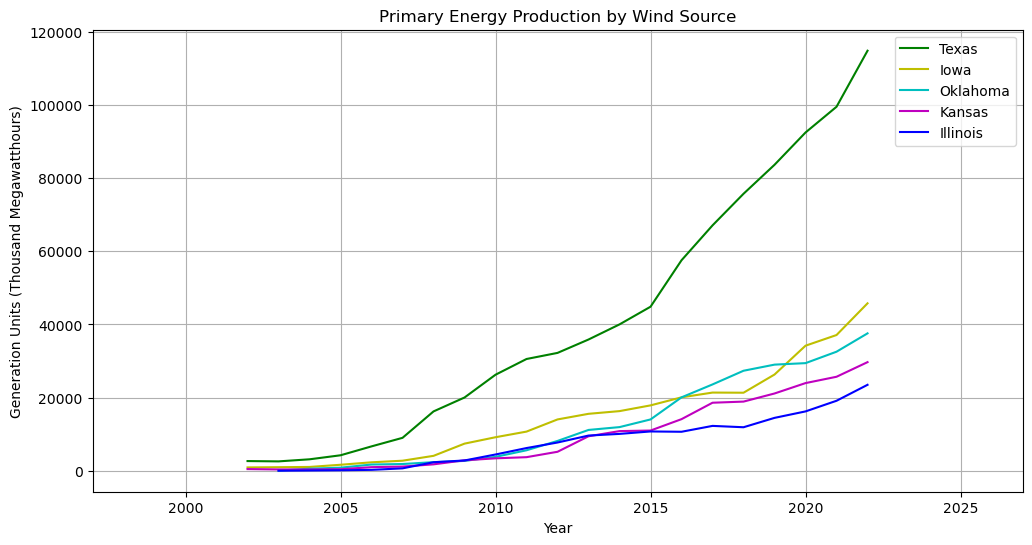

In [20]:
# plot data as a line graph for the top five highest producing states.

# Select the row with index 0 and Description "Coal Production"
# Filter the DataFrame for each type of production
Texas_row = transposed_df[(transposed_df.index == 32) & (transposed_df['State'] == 'Texas')]
Iowa_row = transposed_df[(transposed_df.index == 8) & (transposed_df['State'] == 'Iowa')]
Oklahoma_row = transposed_df[(transposed_df.index == 26) & (transposed_df['State'] == 'Oklahoma')]
Kansas_row = transposed_df[(transposed_df.index == 9) & (transposed_df['State'] == 'Kansas')]
Illinois_row = transposed_df[(transposed_df.index == 6) & (transposed_df['State'] == 'Illinois')]

# Extract the years and values for each production type
years = Texas_row.columns[2:].astype(int)
Texas_values = Texas_row.values[:, 2:].flatten().astype(float)
Iowa_values = Iowa_row.values[:, 2:].flatten().astype(float)
Oklahoma_values = Oklahoma_row.values[:, 2:].flatten().astype(float)
Kansas_values = Kansas_row.values[:, 2:].flatten().astype(float)
Illinois_values = Illinois_row.values[:, 2:].flatten().astype(float)

# Create a line plot for each production type
plt.figure(figsize=(12, 6))
plt.plot(years, Texas_values, linestyle='-', color='g', label='Texas')
plt.plot(years, Iowa_values, linestyle='-', color='y', label='Iowa')
plt.plot(years, Oklahoma_values, linestyle='-', color='c', label='Oklahoma')
plt.plot(years, Kansas_values, linestyle='-', color='m', label='Kansas')
plt.plot(years, Illinois_values, linestyle='-', color='b', label='Illinois')


plt.title("Primary Energy Production by Wind Source")
plt.xlabel("Year")
plt.ylabel("Generation Units (Thousand Megawatthours)")
plt.grid(True)
plt.legend()

# Extend the x-axis by adding extra space on both ends
plt.xlim(years[0] - 5, years[-1] + 5)  # Adjust the numbers to control the extension

plt.show()



In [21]:

new_rows = [
  {'State': 'South Carolina', '2022': 0},
  {'State': 'Florida', '2022': 0},
  {'State': 'Mississippi', '2022': 0},
  {'State': 'Louisiana', '2022': 0},
  {'State': 'District of Columbia', '2022': 0},
  {'State': 'Kentucky', '2022': 0},
  {'State': 'Alabama', '2022': 0},
  {'State': 'Georgia', '2022': 0},
  {'State': 'Arkansas', '2022': 0}, 
]

# Convert the list of dictionaries to a DataFrame
new_rows_df = pd.DataFrame(new_rows)

# Concatenate the original DataFrame and the new rows DataFrame
state_2022_df = pd.concat([state_2022_df, new_rows_df], ignore_index=True).sort_values(by='State').reset_index(drop=True)


In [22]:
# # View 2022 electricity production data as a percentage.

# Create a copy of the original DataFrame
state_2022_pct_df = state_2022_df.copy()

# Calculate the total energy generated in 2022
total_energy_2022 = state_2022_pct_df['2022'].sum()

# Convert the '2022' column into percentages without a lambda
state_2022_pct_df['2022'] = (state_2022_pct_df['2022'] / total_energy_2022) * 100

# Rename the '2022' column to 'Percentage 2022' if you want
state_2022_pct_df.rename(columns={'2022': '2022 % Generation'}, inplace=True)

# Round the percentage values to nearest whole numbers
state_2022_pct_df = state_2022_pct_df.round()

# Sort the DataFrame by 'Percentage 2022' in descending order and reset the index
state_2022_pct_df = state_2022_pct_df.sort_values(by='2022 % Generation', ascending=False).reset_index(drop=True)

# Display the first few rows of the DataFrame
state_2022_pct_df.head()



,State,2022 % Generation
0,Texas,26.0
1,Iowa,11.0
2,Oklahoma,9.0
3,Kansas,7.0
4,Illinois,5.0


In [23]:
# Load in Geojson
gdf = gpd.read_file("C:/Users/mford.MSBIOWORKS/Project_1/gz_2010_us_040_00_5m.json")
# print(monthly_energy_production_df)
gdf.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [24]:
# If you dont remove these they will be included in the plot below and they dont look good. 
# Our analysis is for the 48 contigous states

value_to_delete = ['Alaska','Hawaii', 'Puerto Rico' ]
gdf = gdf[~gdf['NAME'].isin(value_to_delete)]

In [25]:
# Check work
gdf.sort_values(by='NAME', ascending=True, inplace = True)
gdf.reset_index(drop=True, inplace=True)
gdf.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
2,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
3,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
4,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."


In [26]:
# Merge the GeoDataFrame with our dataframe based on the common column 'State'
# how = Left ensure we get the geometry data in our merged dataframe
merged_data = gdf.merge(state_2022_df, left_on='NAME', right_on='State', how='left')
merged_data.head(5)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,State,2022
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ...",Alabama,0.000
1,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0...",Arizona,1564.348
2,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079...",Arkansas,0.000
3,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213...",California,14638.061
4,0400000US08,08,Colorado,,103641.888,"POLYGON ((-106.19055 40.99761, -106.06118 40.9...",Colorado,16911.126


In [27]:
# # Create a new DataFrame with 'State' and '2022' and 'geometry' columns

mapping_data = merged_data[['State', '2022','geometry']].sort_values(by=['State'], ascending=True)

# Print the new DataFrame

mapping_data.head(5)




,State,2022,geometry
0,Alabama,0.000,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,Arizona,1564.348,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
2,Arkansas,0.000,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
3,California,14638.061,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
4,Colorado,16911.126,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."


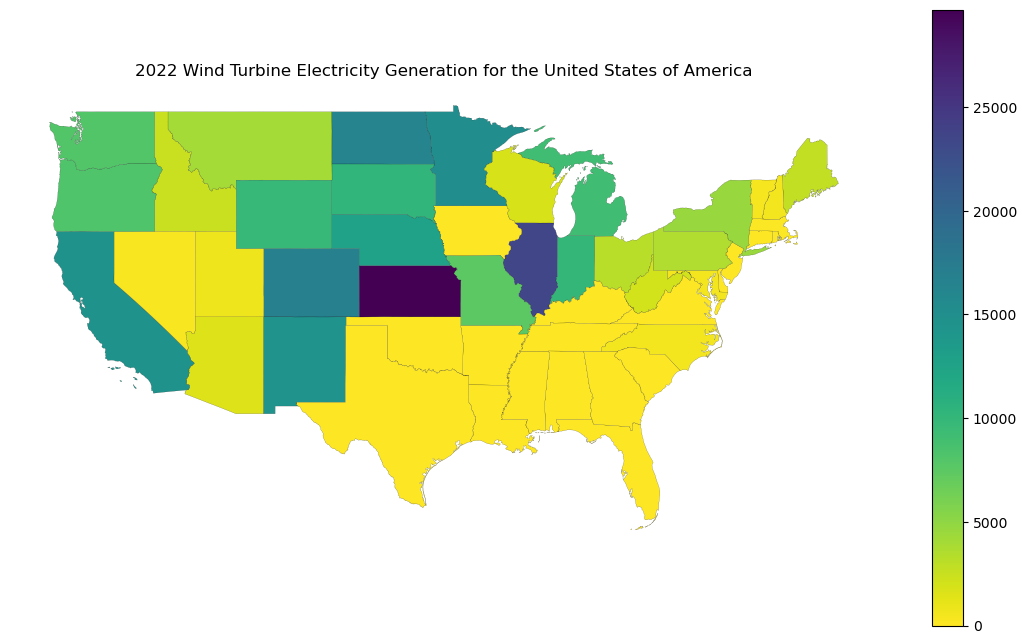

In [44]:
mapping_data = mapping_data.to_crs(epsg=4326)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

mapping_data.plot(column='2022', cmap='viridis_r', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

ax.set_axis_off()
 
plt.title('2022 Wind Turbine Electricity Generation for the United States of America')

plt.show()



In [39]:
# Let's replot but remove data for Texas
mapping_data.at[41, '2022'] = 0  # Replace the value at row 41, column 'Count' with 0
mapping_data.head(5)

,State,2022,geometry
0,Alabama,0.000,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,Arizona,1564.348,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
2,Arkansas,0.000,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
3,California,14638.061,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
4,Colorado,16911.126,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."


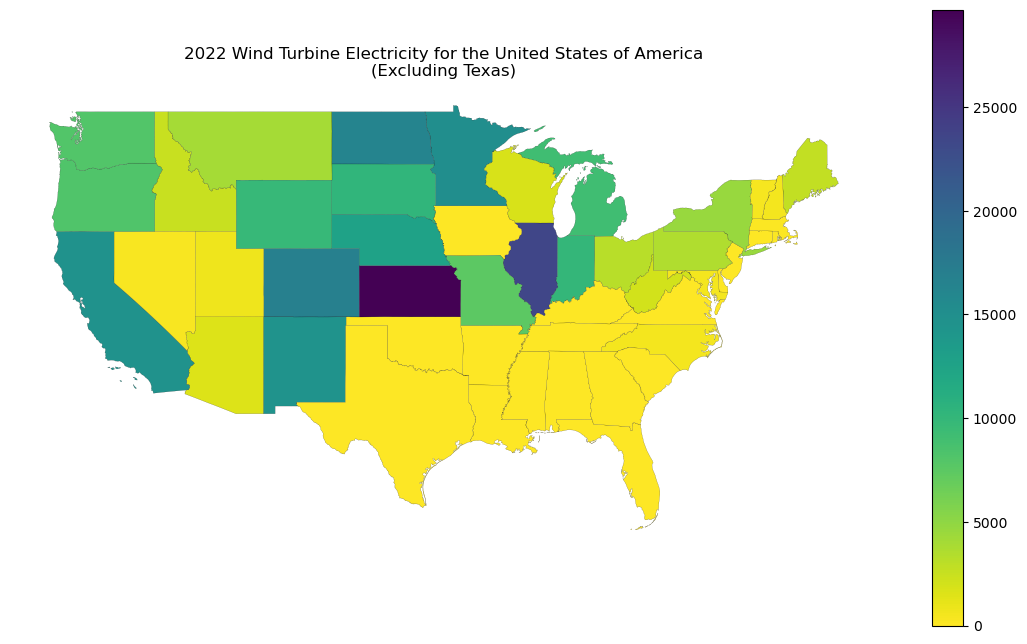

In [40]:
mapping_data = mapping_data.to_crs(epsg=4326)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

mapping_data.plot(column='2022', cmap='viridis_r', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

ax.set_axis_off()
 
plt.title('2022 Wind Turbine Electricity Generation for the United States of America' '\n' '(Excluding Texas)')

plt.show()

In [31]:
# Let's replot but remove data for Texas, Iowa and Oklahoma (the top three window produces)

mapping_data.at[13, '2022'] = 0  # Replace the value at row 0, column 'A' with 10
mapping_data.at[34, '2022'] = 0  # Replace the value at row 0, column 'A' with 10
mapping_data.head(5)


,State,2022,geometry
0,Alabama,0.000,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,Arizona,1564.348,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
2,Arkansas,0.000,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
3,California,14638.061,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."
4,Colorado,16911.126,"POLYGON ((-106.19055 40.99761, -106.06118 40.9..."


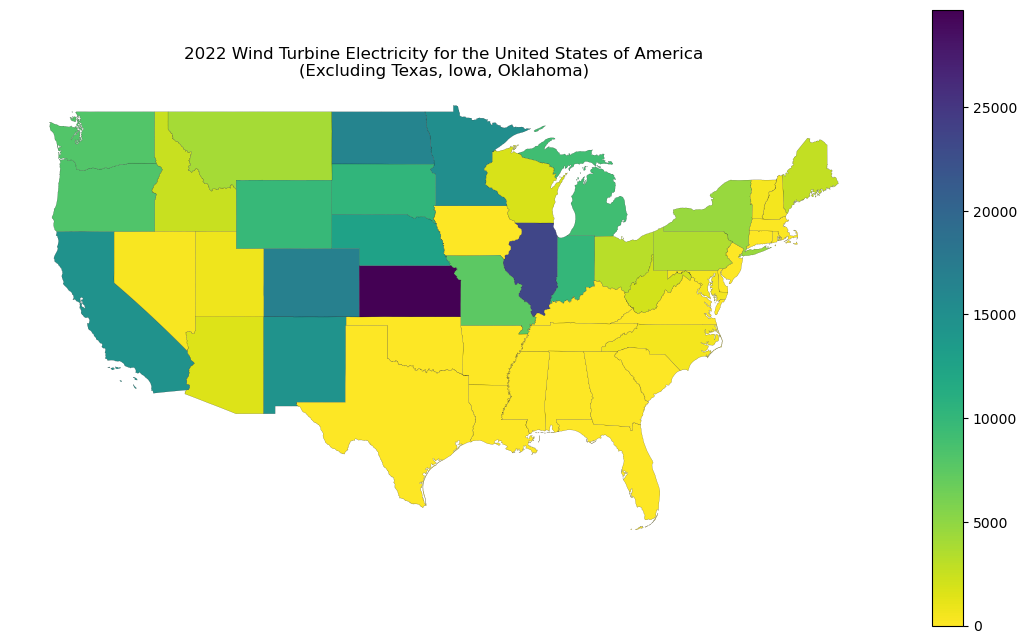

In [36]:
mapping_data = mapping_data.to_crs(epsg=4326)

fig, ax = plt.subplots(1, 1, figsize=(14, 8))

mapping_data.plot(column='2022', cmap='viridis_r', linewidth=0.1, ax=ax, edgecolor='black', legend=True)

ax.set_axis_off()
 
plt.title('2022 Wind Turbine Electricity Generation for the United States of America' '\n' '(Excluding Texas, Iowa, Oklahoma)')

plt.show()

In [47]:
windiest_states = pd.read_csv("C:/Users/mford.MSBIOWORKS/Project_1/windiest-states-2024.csv")
# print(monthly_energy_production_df)
windiest_states.head(5)

,fips,state,densityMi,pop2024,pop2023,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,WindiestStatesAverageWindSpeedMPH,MeanWindSpeed328ft,MeanWindPower328ft,MeanWindSpeed33ft
0,1,Alabama,101.15897,5123196,5098746,5031362,5006199.4,4779736,0.00480,24450,0.07186,14.70,15.5,341,9.1
1,2,Alaska,1.28344,732385,732984,732923,730653.8,710231,-0.00082,-599,0.03119,16.35,21.9,1611,16.3
2,4,Arizona,66.44574,7547837,7453517,7179943,7101150.4,6392017,0.01265,94320,0.18082,15.92,14.5,355,8.7
3,5,Arkansas,59.20375,3080667,3063152,3014195,3004367.3,2915918,0.00572,17515,0.05650,16.44,16.7,421,9.7
4,6,California,249.08392,38802044,38915693,39501653,39276883.3,37253956,-0.00292,-113649,0.04155,13.54,16.6,649,10.7


In [50]:
windiest_states = windiest_states.rename(columns={'state': 'State'})

In [55]:
wind_turbine_count = state_2022_df.merge(windiest_states, on = 'State')
wind_turbine_count

,State,2022,fips,densityMi,pop2024,pop2023,pop2020,pop2019,pop2010,growthRate,growth,growthSince2010,WindiestStatesAverageWindSpeedMPH,MeanWindSpeed328ft,MeanWindPower328ft,MeanWindSpeed33ft
0,Alabama,0.000,1,101.15897,5123196,5098746,5031362,5006199.4,4779736,0.00480,24450,0.07186,14.70,15.5,341,9.1
1,Arizona,1564.348,4,66.44574,7547837,7453517,7179943,7101150.4,6392017,0.01265,94320,0.18082,15.92,14.5,355,8.7
2,Arkansas,0.000,5,59.20375,3080667,3063152,3014195,3004367.3,2915918,0.00572,17515,0.05650,16.44,16.7,421,9.7
3,California,14638.061,6,249.08392,38802044,38915693,39501653,39276883.3,37253956,-0.00292,-113649,0.04155,13.54,16.6,649,10.7
4,Colorado,16911.126,8,56.89956,5897184,5868555,5784865,5709298.1,5029196,0.00488,28629,0.17259,20.16,20.0,751,12.8
5,Connecticut,12.833,9,750.08364,3631905,3629055,3597362,3595035.5,3574097,0.00079,2850,0.01617,13.97,15.9,394,8.9
6,Delaware,4.377,10,536.46691,1045574,1031985,992114,982696.0,897934,0.01317,13589,0.16442,12.91,17.5,482,11.5
7,Florida,0.000,12,430.36515,23078331,22661577,21589602,21310772.8,18801310,0.01839,416754,0.22749,14.63,14.1,245,9.3
8,Georgia,0.000,13,194.08777,11162570,11037723,10729828,10625610.5,9687653,0.01131,124847,0.15225,15.34,14.5,293,8.5
9,Idaho,2441.688,16,24.30298,2008471,1973752,1849202,1821040.0,1567582,0.01759,34719,0.28125,20.59,16.5,472,10.6


In [56]:
print(wind_turbine_count.columns)

Index(['State', '2022', 'fips', 'densityMi', 'pop2024', 'pop2023', 'pop2020',
       'pop2019', 'pop2010', 'growthRate', 'growth', 'growthSince2010',
       'WindiestStatesAverageWindSpeedMPH', 'MeanWindSpeed328ft',
       'MeanWindPower328ft', 'MeanWindSpeed33ft'],
      dtype='object')


In [57]:
# Assuming 'wind_turbine_count' is your DataFrame
columns_to_delete = ['fips', 'densityMi', 'pop2024', 'pop2023', 'pop2020', 'pop2019', 'pop2010', 'growthRate', 'growth', 'growthSince2010', 'MeanWindSpeed328ft', 'MeanWindPower328ft', 'MeanWindSpeed33ft']
wind_turbine_count = wind_turbine_count.drop(columns=columns_to_delete)
wind_turbine_count.head(5)

,State,2022,WindiestStatesAverageWindSpeedMPH
0,Alabama,0.000,14.70
1,Arizona,1564.348,15.92
2,Arkansas,0.000,16.44
3,California,14638.061,13.54
4,Colorado,16911.126,20.16


In [58]:
correlation = wind_turbine_count['2022'].corr(wind_turbine_count['WindiestStatesAverageWindSpeedMPH'])

print(f'Correlation between Column1 and Column2: {correlation}')

Correlation between Column1 and Column2: 0.05275653877055221


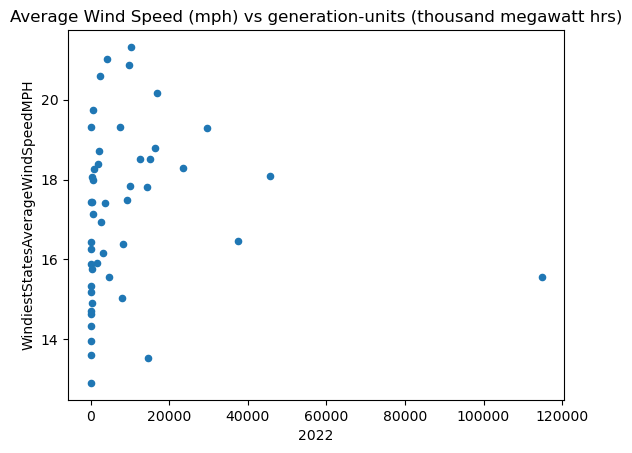

In [60]:
wind_turbine_count.plot(x='2022', y='WindiestStatesAverageWindSpeedMPH', kind='scatter', title='Average Wind Speed (mph) vs generation-units (thousand megawatt hrs)')
plt.show()